In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasetkjg/New folder (2)/test/sarees/images (2).jpg
/kaggle/input/datasetkjg/New folder (2)/test/sarees/download (3).jpg
/kaggle/input/datasetkjg/New folder (2)/test/sarees/images (5).jpg
/kaggle/input/datasetkjg/New folder (2)/test/sarees/images (1).jpg
/kaggle/input/datasetkjg/New folder (2)/test/sarees/download (1).jpg
/kaggle/input/datasetkjg/New folder (2)/test/sarees/images (3).jpg
/kaggle/input/datasetkjg/New folder (2)/test/sarees/download (2).jpg
/kaggle/input/datasetkjg/New folder (2)/test/sarees/download.jpg
/kaggle/input/datasetkjg/New folder (2)/test/sarees/images.jpg
/kaggle/input/datasetkjg/New folder (2)/test/jeans/images (2).jpg
/kaggle/input/datasetkjg/New folder (2)/test/jeans/images (4).jpg
/kaggle/input/datasetkjg/New folder (2)/test/jeans/download (3).jpg
/kaggle/input/datasetkjg/New folder (2)/test/jeans/download (5).jpg
/kaggle/input/datasetkjg/New folder (2)/test/jeans/images (1).jpg
/kaggle/input/datasetkjg/New folder (2)/test/jeans/download (1)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [32]:
PATH = os.getcwd()
# Define data path
data_path = '/kaggle/input/datasetkjg/New folder (2)/test/'
data_path1 = '/kaggle/input/datasetkjg/New folder (2)/train/'
data_dir_list = os.listdir(data_path)
print(data_dir_list)
data_dir_list = os.listdir(data_path1)
data_dir_list

['sarees', 'jeans', 'trousers']


['sarees', 'jeans', 'trouser']

In [57]:
labels = ['jeans', 'trouser']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [58]:
train = get_data('/kaggle/input/datasetkjg/New folder (2)/train/')

In [59]:
labels = ['jeans', 'trousers']

In [60]:
val = get_data('/kaggle/input/datasetkjg/New folder (2)/test/')

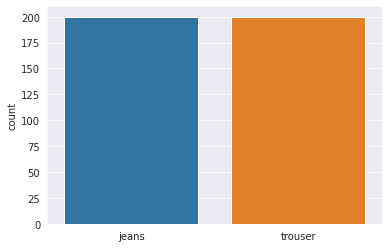

In [62]:
l = []
for i in train:
    if(i[1] == 1):
        l.append("trouser")
    elif(i[1]==0):
        l.append("jeans")
    else:
        l.append("sarees")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, '1')

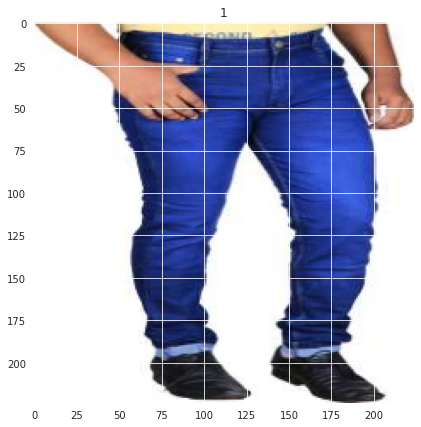

In [63]:
plt.figure(figsize = (7,7))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, '1')

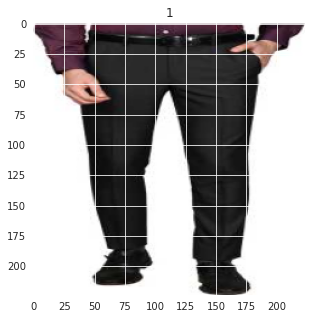

In [64]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[0][1]])

In [66]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [67]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [69]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)       

In [70]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [72]:
history = model.fit(x_train,y_train,epochs =150 , validation_data = (x_val, y_val))

Epoch 1/150
13/13 [==============================] - 15s 1s/step - loss: 0.5827 - accuracy: 0.8500 - val_loss: 0.6536 - val_accuracy: 0.7619
Epoch 2/150
13/13 [==============================] - 14s 1s/step - loss: 0.5808 - accuracy: 0.8675 - val_loss: 0.6532 - val_accuracy: 0.7619
Epoch 3/150
13/13 [==============================] - 14s 1s/step - loss: 0.5768 - accuracy: 0.8625 - val_loss: 0.6525 - val_accuracy: 0.7619
Epoch 4/150
13/13 [==============================] - 14s 1s/step - loss: 0.5740 - accuracy: 0.8675 - val_loss: 0.6520 - val_accuracy: 0.7619
Epoch 5/150
13/13 [==============================] - 15s 1s/step - loss: 0.5756 - accuracy: 0.8675 - val_loss: 0.6512 - val_accuracy: 0.7619
Epoch 6/150
13/13 [==============================] - 14s 1s/step - loss: 0.5731 - accuracy: 0.8675 - val_loss: 0.6499 - val_accuracy: 0.7619
Epoch 7/150
13/13 [==============================] - 14s 1s/step - loss: 0.5728 - accuracy: 0.8475 - val_loss: 0.6491 - val_accuracy: 0.7619
Epoch 8/150
1

Epoch 59/150
13/13 [==============================] - 15s 1s/step - loss: 0.4919 - accuracy: 0.9175 - val_loss: 0.6031 - val_accuracy: 0.8095
Epoch 60/150
13/13 [==============================] - 14s 1s/step - loss: 0.4920 - accuracy: 0.9100 - val_loss: 0.6018 - val_accuracy: 0.7619
Epoch 61/150
13/13 [==============================] - 15s 1s/step - loss: 0.4916 - accuracy: 0.8975 - val_loss: 0.6016 - val_accuracy: 0.8095
Epoch 62/150
13/13 [==============================] - 14s 1s/step - loss: 0.4892 - accuracy: 0.9225 - val_loss: 0.6011 - val_accuracy: 0.7619
Epoch 63/150
13/13 [==============================] - 15s 1s/step - loss: 0.4869 - accuracy: 0.9250 - val_loss: 0.6002 - val_accuracy: 0.7619
Epoch 64/150
13/13 [==============================] - 14s 1s/step - loss: 0.4850 - accuracy: 0.9350 - val_loss: 0.5993 - val_accuracy: 0.7619
Epoch 65/150
13/13 [==============================] - 14s 1s/step - loss: 0.4847 - accuracy: 0.9275 - val_loss: 0.5984 - val_accuracy: 0.7619
Epoch 

13/13 [==============================] - 14s 1s/step - loss: 0.4391 - accuracy: 0.9525 - val_loss: 0.5726 - val_accuracy: 0.7143
Epoch 117/150
13/13 [==============================] - 15s 1s/step - loss: 0.4388 - accuracy: 0.9475 - val_loss: 0.5727 - val_accuracy: 0.7143
Epoch 118/150
13/13 [==============================] - 14s 1s/step - loss: 0.4378 - accuracy: 0.9600 - val_loss: 0.5720 - val_accuracy: 0.7143
Epoch 119/150
13/13 [==============================] - 14s 1s/step - loss: 0.4384 - accuracy: 0.9525 - val_loss: 0.5713 - val_accuracy: 0.7619
Epoch 120/150
13/13 [==============================] - 14s 1s/step - loss: 0.4355 - accuracy: 0.9575 - val_loss: 0.5716 - val_accuracy: 0.7143
Epoch 121/150
13/13 [==============================] - 15s 1s/step - loss: 0.4352 - accuracy: 0.9575 - val_loss: 0.5710 - val_accuracy: 0.7143
Epoch 122/150
13/13 [==============================] - 14s 1s/step - loss: 0.4363 - accuracy: 0.9675 - val_loss: 0.5705 - val_accuracy: 0.7143
Epoch 123/150

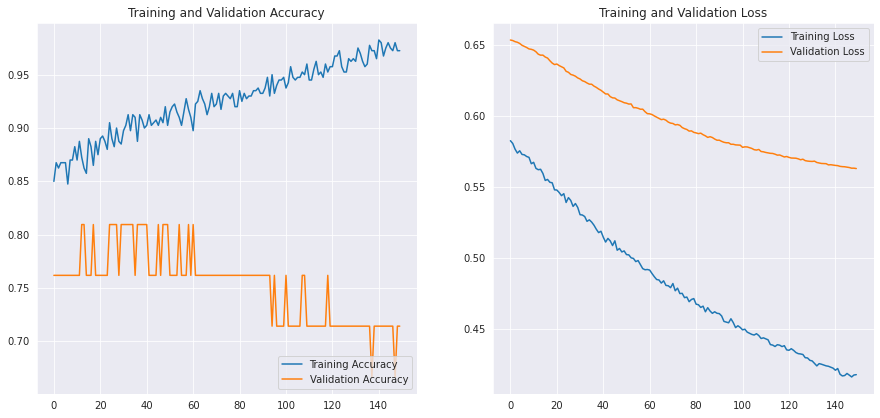

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(150)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [74]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['jeans (Class 0)','sarees (Class 1)']))

                  precision    recall  f1-score   support

 jeans (Class 0)       0.67      0.80      0.73        10
sarees (Class 1)       0.78      0.64      0.70        11

        accuracy                           0.71        21
       macro avg       0.72      0.72      0.71        21
    weighted avg       0.72      0.71      0.71        21



In [75]:
# transferlearning

In [76]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

9412608/9406464 [==============================] - 0s 0us/step


In [79]:
base_model.trainable = False
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(2, activation="softmax")                                     
                                ])

In [ ]:
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs = 150 , validation_data = (x_val, y_val))

Epoch 1/150
13/13 [==============================] - 9s 707ms/step - loss: 1.0826 - accuracy: 0.4775 - val_loss: 1.0724 - val_accuracy: 0.4762
Epoch 2/150
13/13 [==============================] - 8s 643ms/step - loss: 1.0445 - accuracy: 0.4675 - val_loss: 1.0367 - val_accuracy: 0.4762
Epoch 3/150
13/13 [==============================] - 9s 676ms/step - loss: 1.0056 - accuracy: 0.4850 - val_loss: 1.0035 - val_accuracy: 0.4762
Epoch 4/150
13/13 [==============================] - 9s 670ms/step - loss: 0.9793 - accuracy: 0.4525 - val_loss: 0.9731 - val_accuracy: 0.4286
Epoch 5/150
13/13 [==============================] - 8s 641ms/step - loss: 0.9639 - accuracy: 0.4425 - val_loss: 0.9447 - val_accuracy: 0.4286
Epoch 6/150
13/13 [==============================] - 8s 642ms/step - loss: 0.9281 - accuracy: 0.4225 - val_loss: 0.9189 - val_accuracy: 0.4286
Epoch 7/150
13/13 [==============================] - 8s 649ms/step - loss: 0.9082 - accuracy: 0.4325 - val_loss: 0.8955 - val_accuracy: 0.4286

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(150)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]

print(classification_report(y_val, predictions, target_names = ['Jeans  (Class 0)','trousers (Class 1)']))